#Price sales optimization in accordance with price elasticity

In [1]:
#Install required packages
!pip install pandas==1.1.5
!pip install numpy==1.19.5
!pip install statsmodels==0.10.2
!pip install  matplotlib==3.2.2
!pip install seaborn==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 510 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cmdst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.1 MB 2.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.10.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 5.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninsta

In [2]:
# Import reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Display all rows and columns of a dataframe
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Load data

In [5]:
# load the datasets
sold = pd.read_csv('/content/drive/MyDrive/Intern Projects/Cafe+-+Sell+Meta+Data.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Intern Projects/Cafe+-+Transaction+-+Store.csv')
date = pd.read_csv('/content/drive/MyDrive/Intern Projects/Cafe+-+DateInfo.csv')

In [6]:
# Quick view sell data
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [7]:
# Statistical data observation
sold.describe()
sold.describe(include = ['O']) 

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [8]:
#Check null values
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


In [9]:
#Quick view transaction data
transactions.head(20)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0
5,01/02/12,12.73,22,2051,2
6,01/02/12,12.75,16,2052,2
7,01/02/12,12.60,34,2053,2
8,01/03/12,15.50,62,1070,0
9,01/03/12,12.73,26,2051,2


In [10]:
#Statistical data observation
transactions.describe()
transactions.describe(include = ['O']) # Summarize the objects(strings) 

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [11]:
#Check null values
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

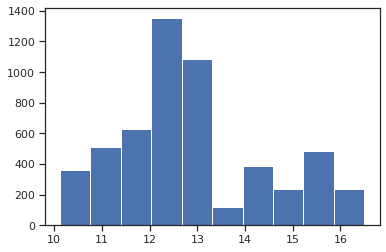

In [12]:
# plot histogram to observe data distribution
plt.hist(transactions.PRICE)

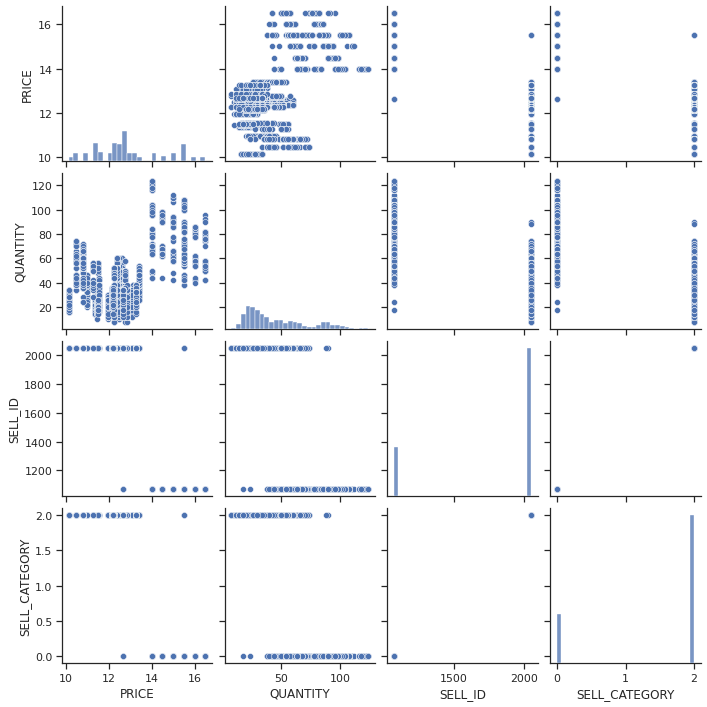

In [13]:
# plot a pairplot for the data
sns.pairplot(transactions)

In [14]:
#Quick view date data
date.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [15]:
#Check null value
date[date.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [16]:
#Missing data imputation
date['HOLIDAY']=date['HOLIDAY'].fillna('No holiday')

In [17]:
date

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No holiday,0,0,32.0,1
4,1/5/12,2012,No holiday,0,0,24.8,0
5,1/6/12,2012,No holiday,0,0,23.0,0
6,1/7/12,2012,No holiday,1,0,26.6,0
7,1/8/12,2012,No holiday,1,0,26.6,0
8,1/9/12,2012,No holiday,0,0,23.0,0
9,1/10/12,2012,No holiday,0,0,24.8,0


In [18]:
#Statistical data observation
date.describe()
date.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,1349
unique,1348,9
top,3/1/13,No holiday
freq,2,1244


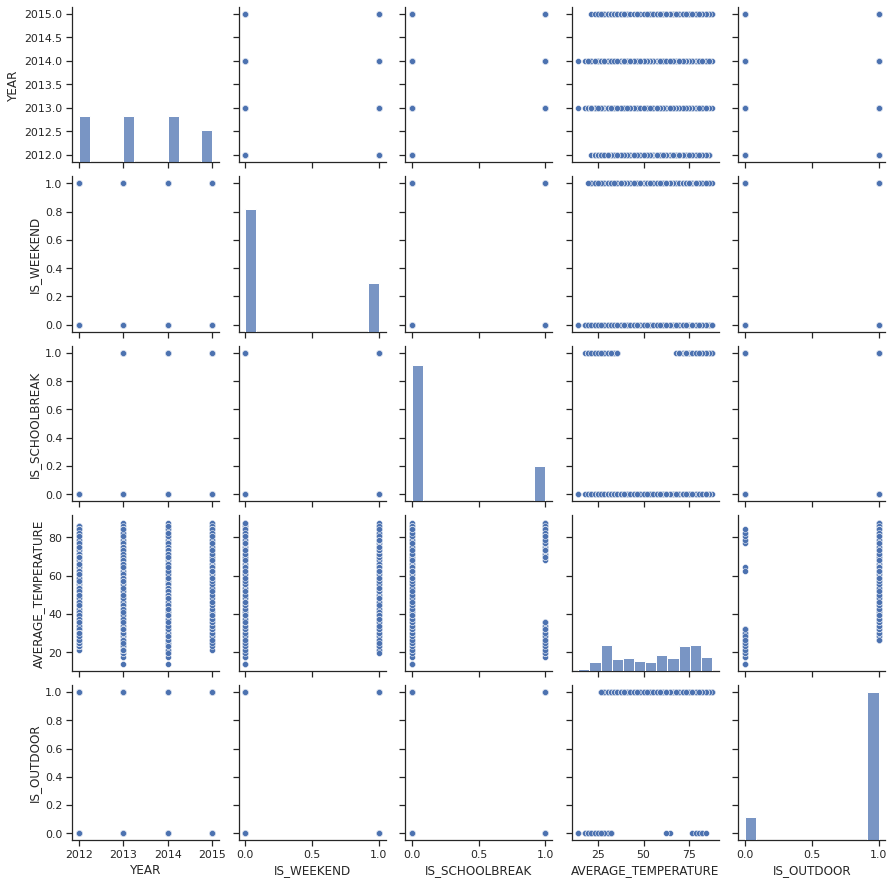

In [19]:
# pairplot 
sns.pairplot(date)

# Data exploration

In [20]:
# check for unique values
np.unique(date['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [21]:
# minimum date & max date
date['CALENDAR_DATE'].min()
date['CALENDAR_DATE'].max()


'1/1/12'

'9/9/15'

In [22]:
#Concatenate data (consolidate)
pd.concat([sold,pd.get_dummies(sold.ITEM_NAME)],axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,SELL_CATEGORY,ITEM_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,,,
1070,1070,0,7821,1,0,0,0
2051,4102,4,12851,1,0,1,0
2052,4104,4,14070,1,0,0,1
2053,6159,6,15903,1,1,1,0
3028,3028,0,6249,0,0,0,1
3055,3055,0,3052,0,1,0,0
3067,3067,0,5030,0,0,1,0


In [23]:
#Merge important information
data1= pd.merge(sold.drop([('ITEM_ID')],axis=1),transactions.drop(['SELL_CATEGORY'],axis=1))
data1.head(30)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [24]:
data2=data1.groupby(['SELL_ID','SELL_CATEGORY','ITEM_NAME','CALENDAR_DATE','PRICE']).QUANTITY.sum()
data2.head(20)

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5      46
                                   01/01/13       15.5      60
                                   01/01/14       15.5      72
                                   01/01/15       14.0      66
                                   01/02/12       15.5      70
                                   01/02/13       15.5      68
                                   01/02/14       15.5      76
                                   01/02/15       14.0     102
                                   01/03/12       15.5      62
                                   01/03/13       15.5      70
                                   01/03/14       15.5      68
                                   01/03/15       14.0      68
                                   01/04/12       15.5      88
                                   01/04/13       15.5     100
                                   01/04/14       15.5      74

In [25]:
data1.shape
data2.shape


(10808, 6)

(10792,)

In [26]:
intermediate_data = data2.reset_index()
intermediate_data.shape

(10792, 6)

In [27]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


Combine data with date to observe its pattern

In [28]:
combine_data=pd.merge(intermediate_data,date)
combine_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0


In [29]:
combine_data.shape

(6696, 12)

In [30]:
#Check missing values
combine_data[combine_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [31]:
#Create "business as usual" data for analysing sales without special days (remove holidays, weekend, school break)
bau_data= combine_data[( combine_data['HOLIDAY']=='No holiday') & ( combine_data['IS_WEEKEND']==0) & ( combine_data['IS_SCHOOLBREAK']==0)]

In [32]:
bau_data.head(10)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.50,104,2014,No holiday,0,0,28.4,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No holiday,0,0,28.4,0


In [33]:
#Check its specific day
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No holiday'], dtype=object)

array([0])

array([0])

## Histogram of bau_data

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

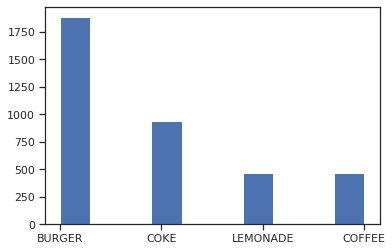

In [34]:
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

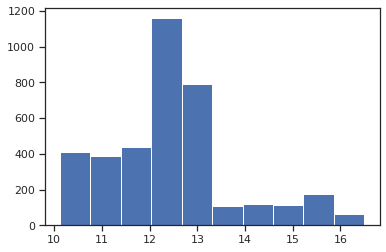

In [35]:
plt.hist(bau_data.PRICE)

##Scatter plot

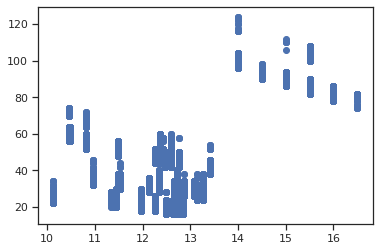

In [36]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

##Pairplot of bau_data

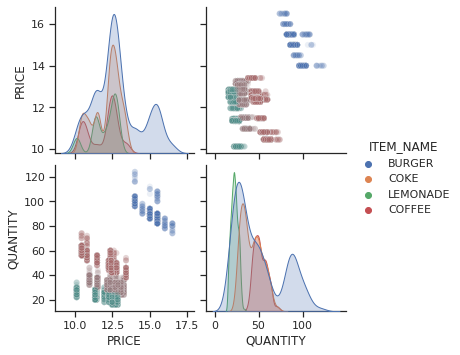

In [37]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue='ITEM_NAME',plot_kws={'alpha':0.1})

From the graph it could be noticed that for all quantities, as the price is increased the quantity sold is decreased.  
Observe the burgur's pattern first

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,No holiday,1,0,30.2,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


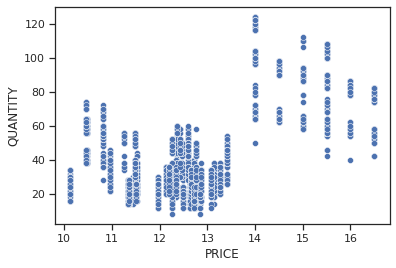

In [38]:
burger =  combine_data[ combine_data['ITEM_NAME'] == 'BURGER'] # Filter item name to leave only burger
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

From the above scatter plot it is  visible that there must be different types of burgers being sold.   
It is advisable to observe its distribution by differentiating with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately

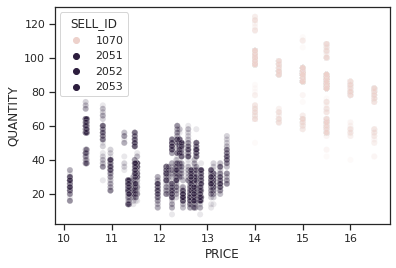

In [39]:
burger = combine_data[combine_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend='full', alpha = 0.1)


In [40]:
np.unique(combine_data.SELL_ID) # 4 unique attributes could be observed

array([1070, 2051, 2052, 2053])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,No holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No holiday,0,0,28.4,0
32,1070,0,BURGER,1/14/12,15.5,74,2012,No holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


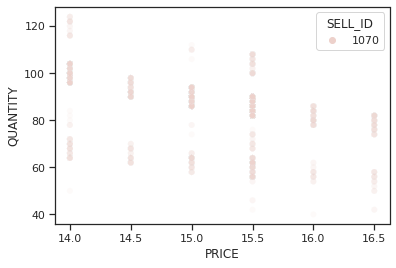

In [41]:
burger_1070 = combine_data[(combine_data['ITEM_NAME'] == 'BURGER') & (combine_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, hue='SELL_ID', legend='full', alpha = 0.1)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No holiday,1,0,23.0,0
41,2051,2,BURGER,1/14/13,13.13,36,2013,No holiday,0,1,30.2,0
49,2051,2,BURGER,1/14/14,13.27,24,2014,No holiday,0,0,28.4,1
57,2051,2,BURGER,1/14/15,11.53,42,2015,No holiday,0,0,30.2,0
65,2051,2,BURGER,1/15/12,12.73,22,2012,No holiday,1,0,32.0,1
73,2051,2,BURGER,1/15/13,13.13,32,2013,No holiday,0,1,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


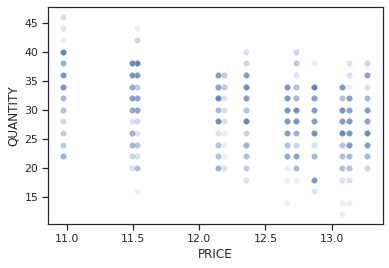

In [42]:
burger_2051 = combine_data[(combine_data['ITEM_NAME'] == 'BURGER') & (combine_data['SELL_ID'] == 2051)]
burger_2051.head(10)
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

#Model(Ordinary least squares)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           1.45e-32
Time:                        09:14:40   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

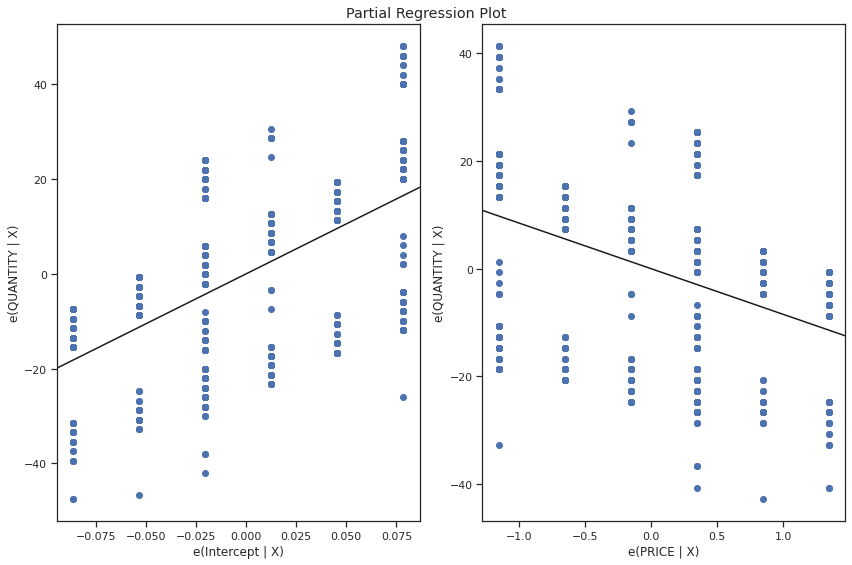

In [43]:
# Take burger data to be observed
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

There are two crucial parameters for assessing.  
'R-suared value' for evaluating the performance of model  
'Coefficiency of price' for evauating price of elasticity  
R-squared value is 0.156 which is not good to fit and the variations from the plots are too high

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


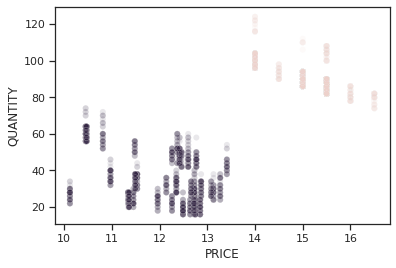

In [44]:
# Observe burger data without specific holidays 
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
# print(burger)
burger.describe()
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [45]:
# check for unique values
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053])

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,No holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,No holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,471.0,471.0,471.000000,471.000000,471.000000,471.0,471.0,471.000000,471.000000
mean,1070.0,0.0,15.124204,91.622081,2013.186837,0.0,0.0,53.691720,0.883227
std,0.0,0.0,0.705577,9.437897,1.059464,0.0,0.0,18.736854,0.321491
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,70.700000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


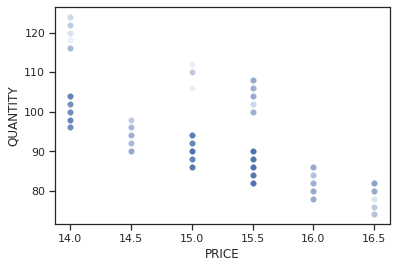

In [46]:
# Take 1070 for observation
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

Scatter plot looks more cleaner by removing specific days

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           7.16e-70
Time:                        09:51:04   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

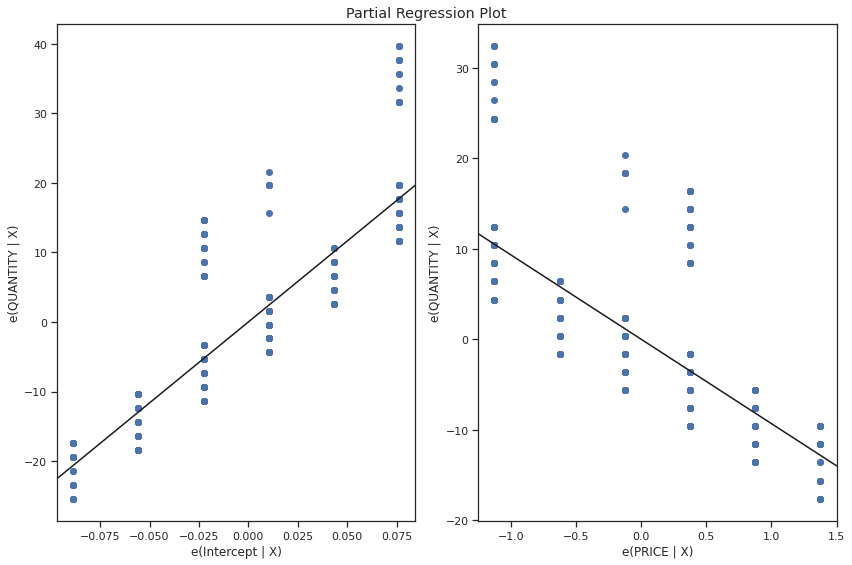

In [47]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

Take a look at bau_data to see if there is another critical prameter for optimizing model

In [48]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0


In [49]:
bau2_data= combine_data[(combine_data['HOLIDAY']=='No holiday')& (combine_data['IS_SCHOOLBREAK']==0) & (combine_data['IS_WEEKEND']==0)& (combine_data['IS_OUTDOOR']==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


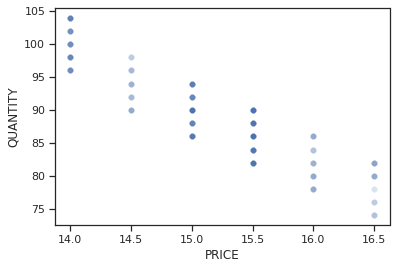

In [50]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x= burger_1070.PRICE, y = burger_1070.QUANTITY, alpha=0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          5.51e-153
Time:                        10:00:44   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

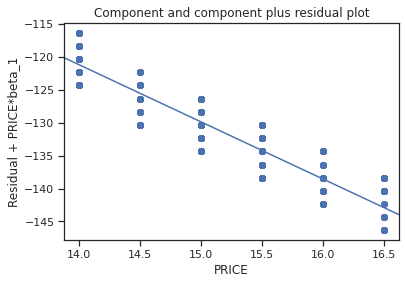

In [51]:
# Fit ols model
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

From previous plot, R-squared value is 0.813 which is pretty good to observe coef price

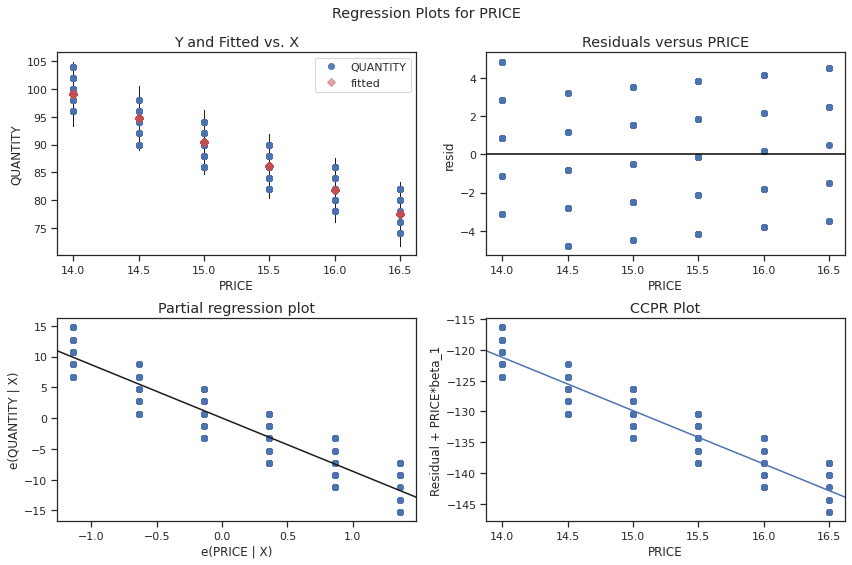

In [52]:
# Other plots for observing quantity against price 
# Red dots is fitted value 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

##Explore other parameters by plotting with same principles

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


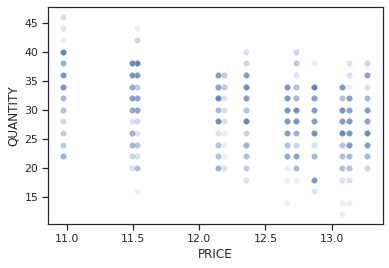

In [53]:
# Take sell id=2051 for observing
burger_2051 = combine_data[(combine_data['ITEM_NAME'] == 'BURGER') & (combine_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.45e-27
Time:                        10:18:39   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

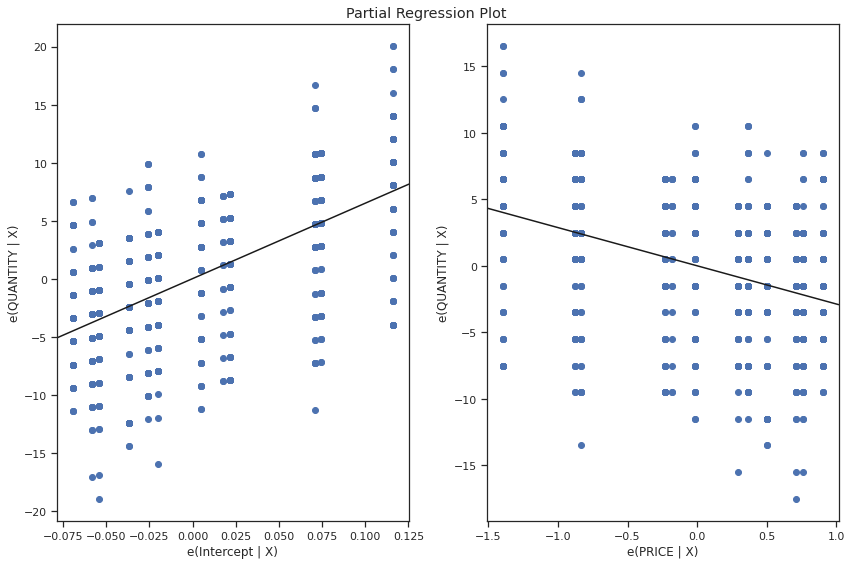

In [54]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

Coke

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,No holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,No holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,No holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,No holiday,0,0,28.4,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


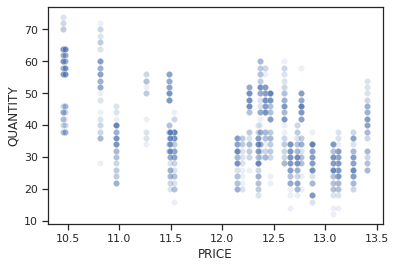

In [55]:
# Take coke data
coke = combine_data[combine_data['ITEM_NAME'] == 'COKE'] # for coke
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

Scatter plot of coke seems not very clear to discover its pattern

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          1.94e-104
Time:                        10:35:06   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

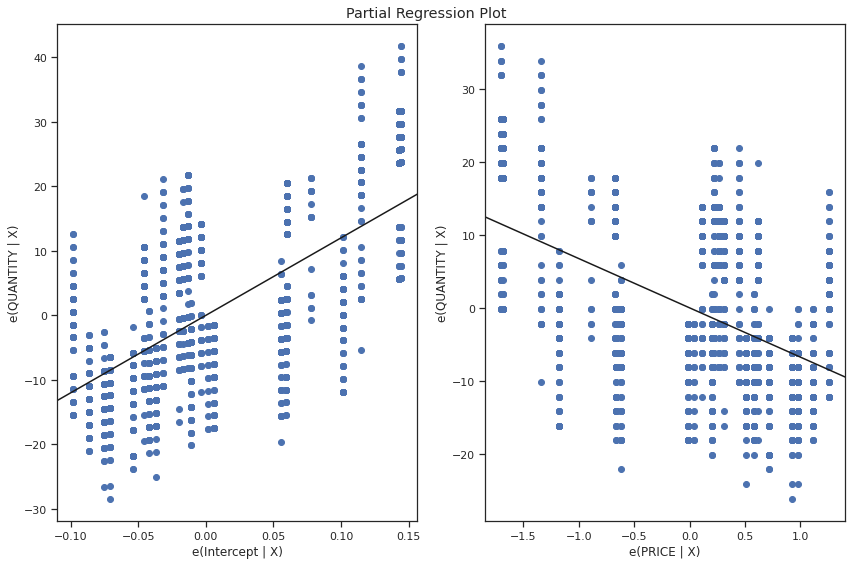

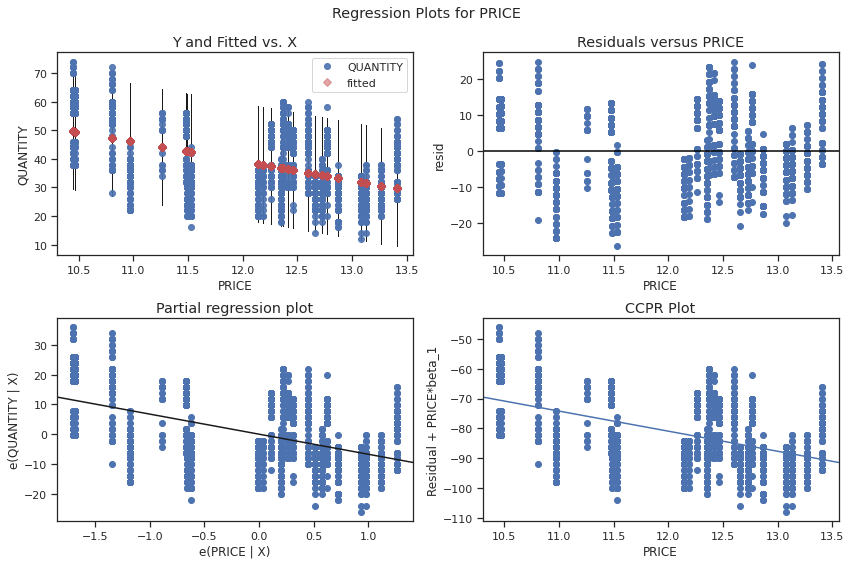

In [59]:
coke_model = ols("QUANTITY~PRICE", data=coke).fit() # build coke model
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

Coffee

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/13/12,12.60,58,2012,No holiday,0,0,26.6,0
14,2053,2,COFFEE,1/13/13,13.41,32,2013,No holiday,1,0,30.2,0
22,2053,2,COFFEE,1/13/14,12.37,60,2014,No holiday,0,0,28.4,0
30,2053,2,COFFEE,1/13/15,10.81,66,2015,No holiday,0,0,28.4,0
38,2053,2,COFFEE,1/14/12,12.60,42,2012,No holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


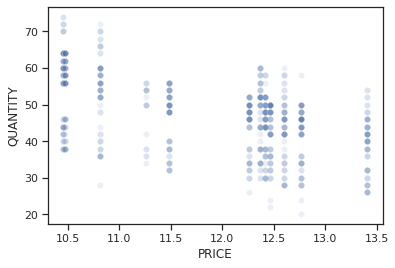

In [61]:
# Observe coffee
coffee = combine_data[combine_data['ITEM_NAME'] == 'COFFEE'] 
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           6.20e-62
Time:                        10:42:15   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

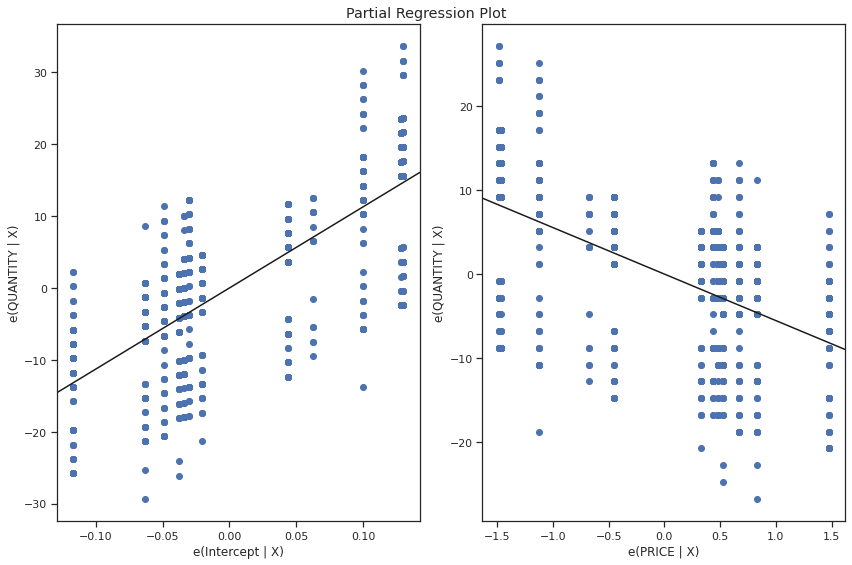

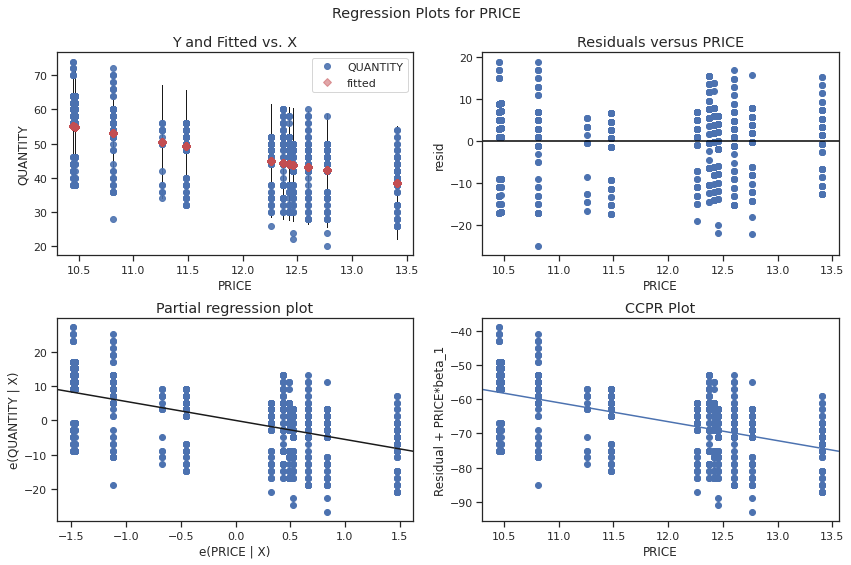

In [62]:
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit() # build and fit the model
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

Lemonade

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No holiday,0,0,26.6,0
12,2052,2,LEMONADE,1/13/13,12.64,18,2013,No holiday,1,0,30.2,0
20,2052,2,LEMONADE,1/13/14,11.96,24,2014,No holiday,0,0,28.4,0
28,2052,2,LEMONADE,1/13/15,11.45,28,2015,No holiday,0,0,28.4,0
36,2052,2,LEMONADE,1/14/12,12.75,20,2012,No holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


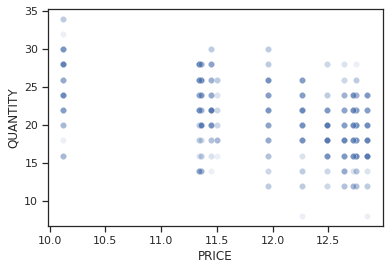

In [63]:
lemon = combine_data[combine_data['ITEM_NAME'] == 'LEMONADE'] # for lemonade
lemon.head()
lemon.shape
lemon.describe()
sns.scatterplot(x = lemon.PRICE, y = lemon.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           7.46e-46
Time:                        10:45:09   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

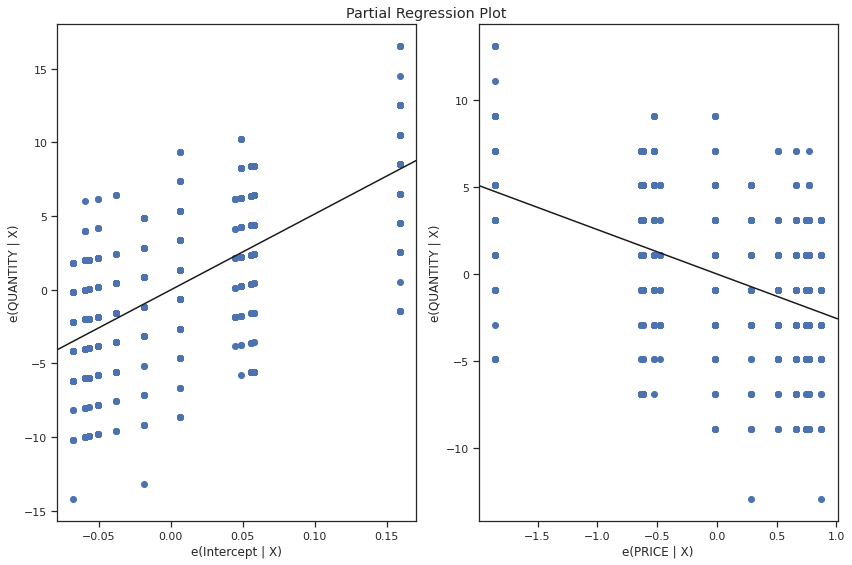

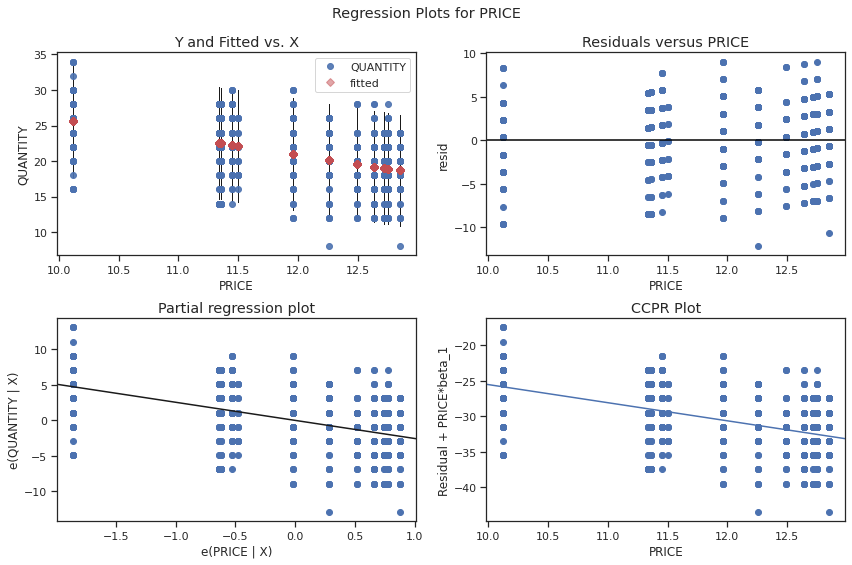

In [64]:
lemon_model = ols("QUANTITY ~ PRICE", data=lemon).fit() # build and fit the model
print(lemon_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lemon_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lemon_model, 'PRICE', fig=fig)

##Elasticity

In [65]:
elasticities = {}

In [69]:
# function to create a model and finding elasticity 
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit() # fit the model
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary()) 
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig) 
    return price_elasticity, model

Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          5.51e-153
Time:                        10:58:10   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


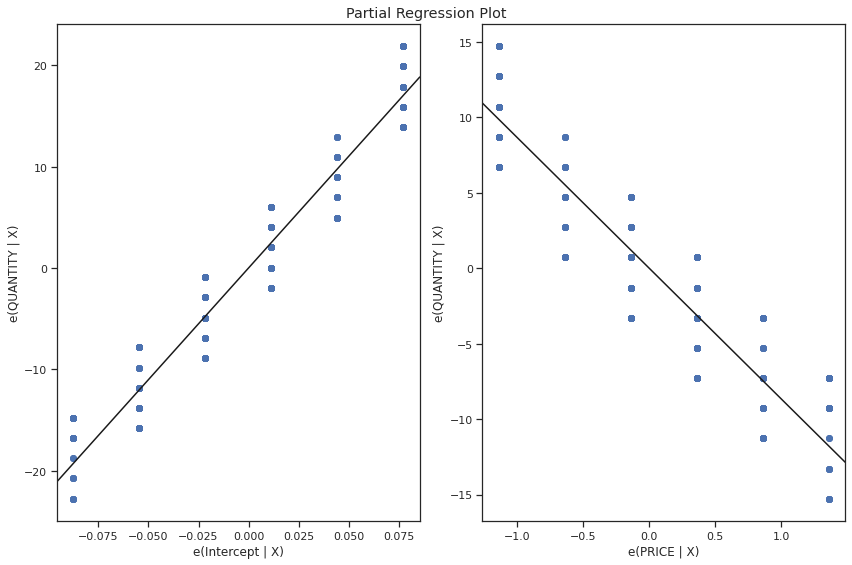

In [70]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           1.34e-58
Time:                        10:59:02   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


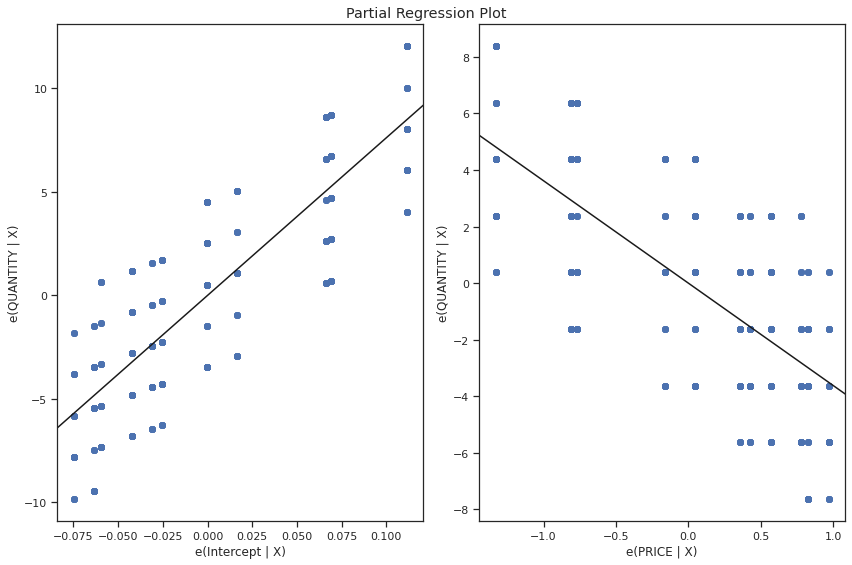

In [71]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           5.32e-53
Time:                        10:59:19   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

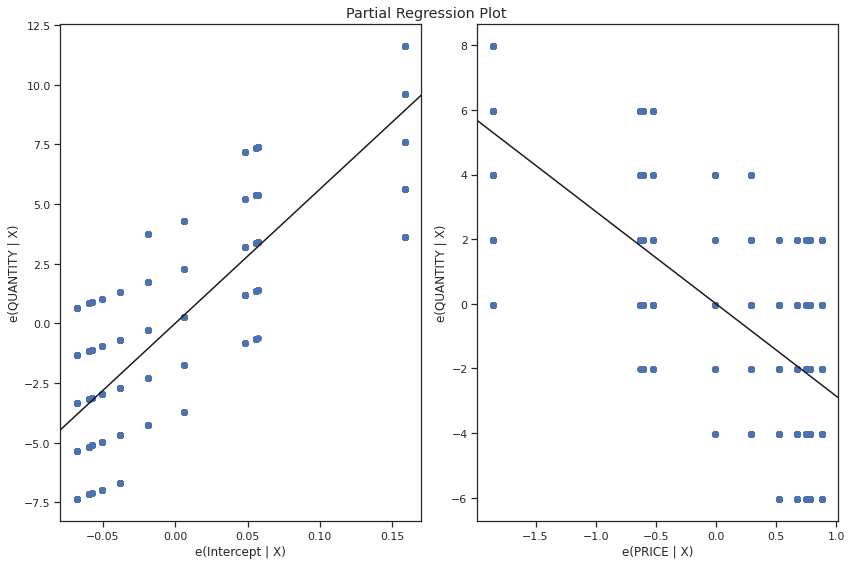

In [72]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          3.72e-152
Time:                        11:07:00   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


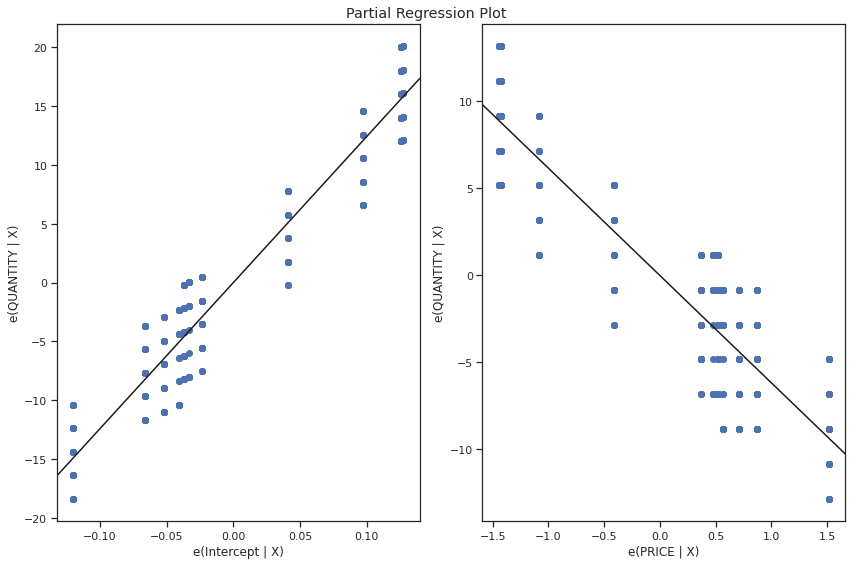

In [73]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: -7.460103485084992
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.00e-82
Time:                        11:07:11   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084992,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fbf9f8051d0>)

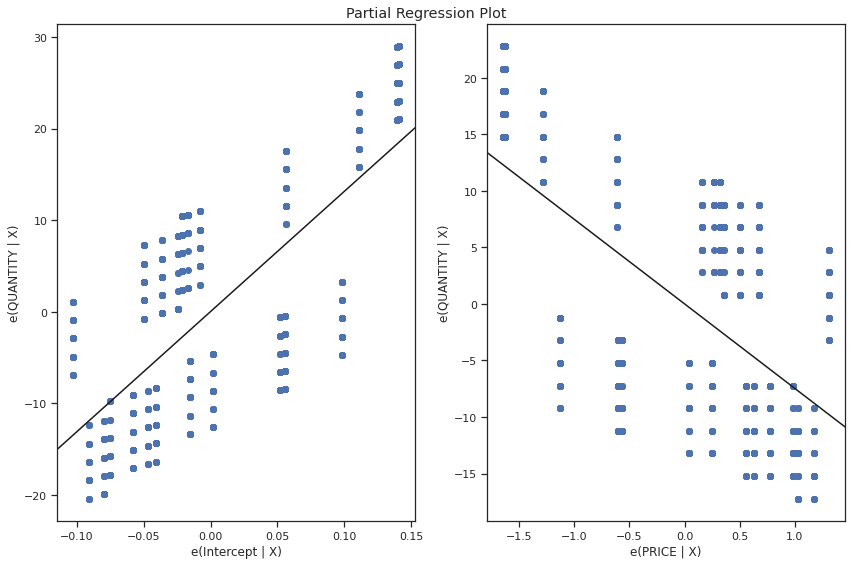

In [74]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

Observe single specific coke data

In [75]:
coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

ValueError: ignored

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          3.72e-152
Time:                        11:17:25   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


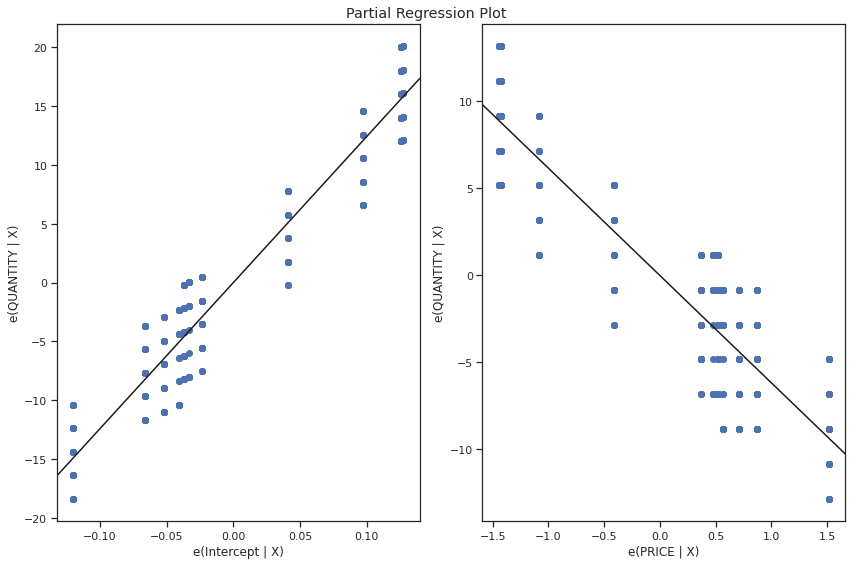

In [76]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           1.34e-58
Time:                        11:17:35   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


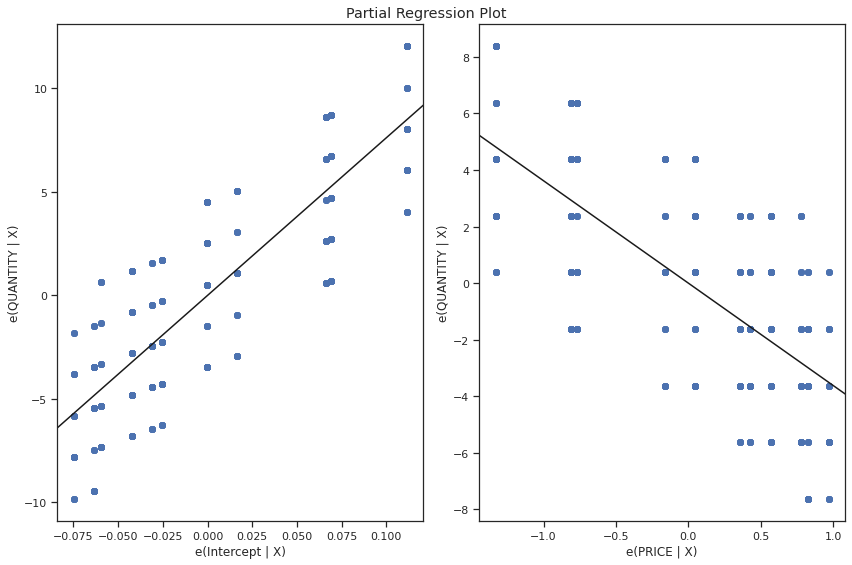

In [77]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           5.32e-53
Time:                        11:20:35   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

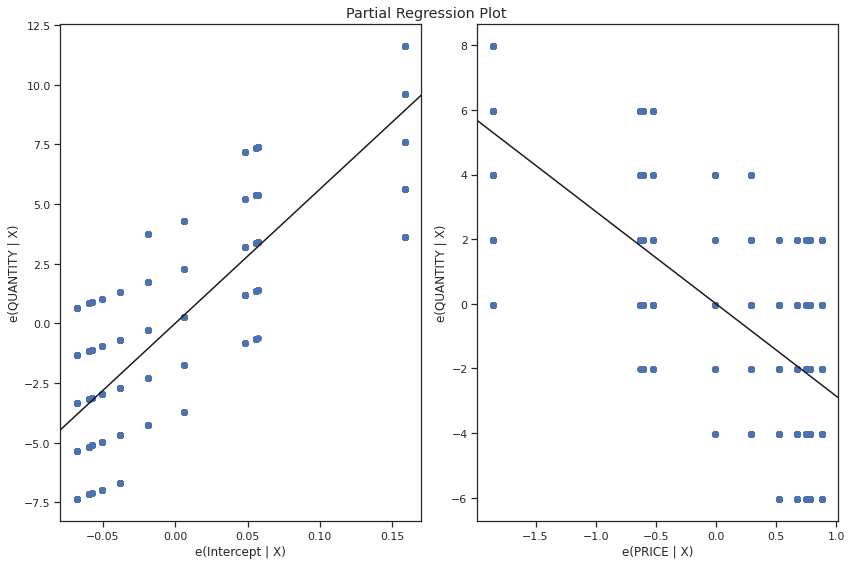

In [78]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [79]:
lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

ValueError: ignored

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          3.72e-152
Time:                        11:21:03   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


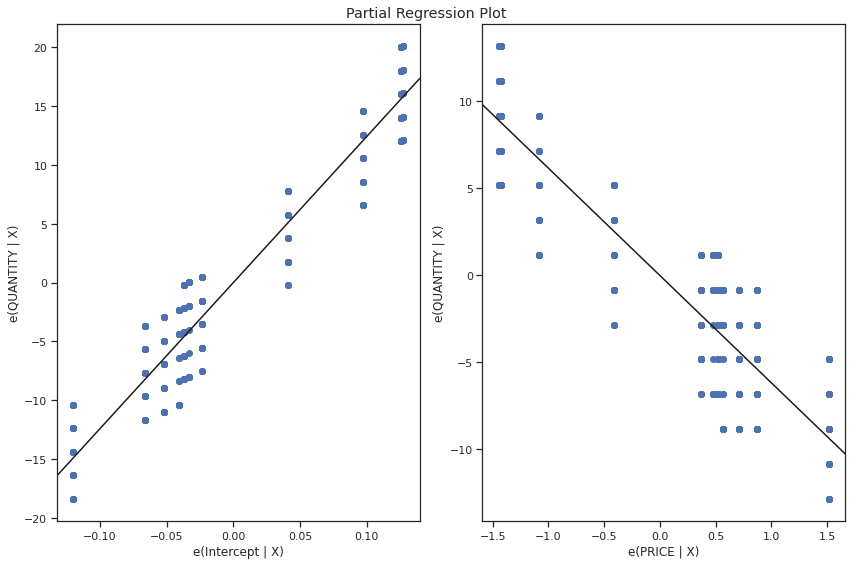

In [80]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [81]:
coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

ValueError: ignored

##Elasticities comparison

In [82]:
elasticities

{'burger_1070': -8.658581488470567,
 'burger_2051': -3.618990615456309,
 'burger_2052': -2.8567029845599605,
 'burger_2053': -6.164156666230162,
 'coke_2053': -6.164156666230162,
 'coke_2051': -3.618990615456309,
 'lemonade_2052': -2.8567029845599605,
 'coffee_2053': -6.164156666230162}

##Find out optimal price for max profit

Start to explore coke data with id=2053, since there's no information about buying price of this coke, just assume it to be a little less than the minimum coke price in the dataset

In [83]:
coke_data = coke_data_2053

In [84]:
# minimum price
coke_data.PRICE.min()

10.45

In [85]:
# maximum price
coke_data.PRICE.max()

13.41

Assume 9 as the buying price of coke. Now set the price of coke in order to get the maximum profit. PRICE is the selling price

In [86]:
buying_price_coke = 9

$$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$$

In [87]:
start_price = 9.5
end_price = 20

In [88]:
# Create a test dataset
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [89]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [90]:
test['QUANTITY'] = model_coke_2053.predict(test['PRICE'])

In [92]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [93]:
test

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701
5,9.55,41.578071,22.867939
6,9.56,41.541881,23.263454
7,9.57,41.505691,23.658244
8,9.58,41.469501,24.052311
9,9.59,41.433312,24.445654


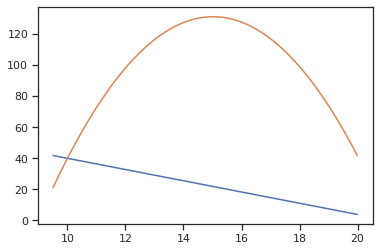

In [94]:
# plot the test 
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [95]:
# Take the max data out
index = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [96]:
test.loc[[index]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


In [97]:
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1              # start price ( a little bit lower than the min price)
    end_price = data.PRICE.min() + 10               # end price (+10 would be convinient to see its range)
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])  # choose required columns
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])         # make predictions
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

## Calculate the optimal price of all products and list them

In [99]:
optimal_price = {}

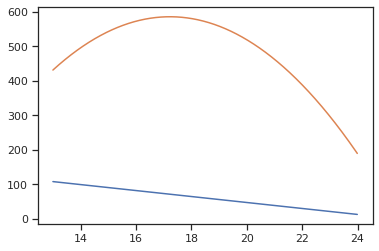

In [100]:
buying_price = 9
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [101]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

Burger 2051

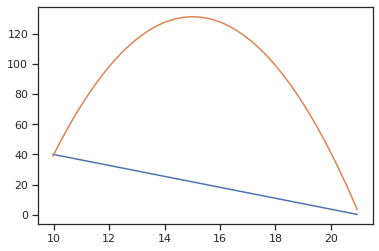

In [102]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

Burger 2052

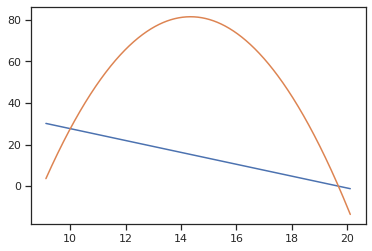

In [103]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

Burger 2053

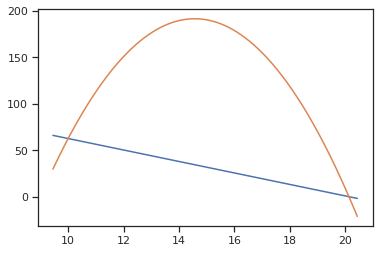

In [104]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

Coke 2051

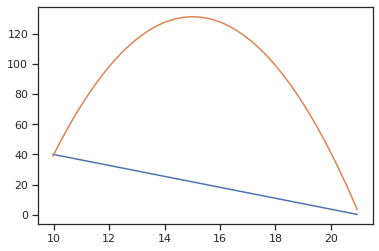

In [105]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

Coke 2053

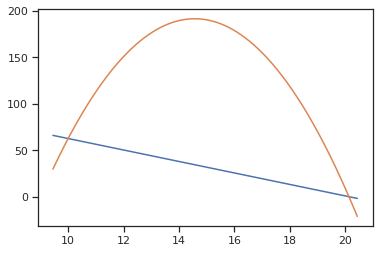

In [106]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

Lemonade 2052

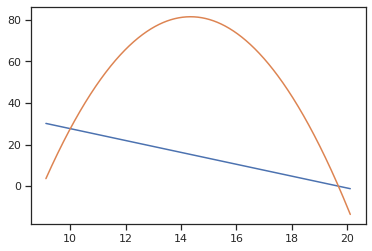

In [107]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

Coffee 2053

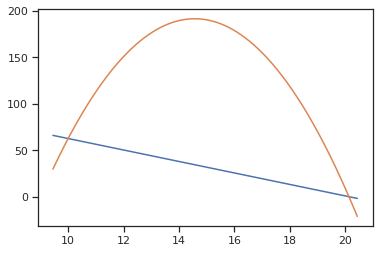

In [108]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [109]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

##Conclusion

From 'optimal_price' list, it shows how to earn max profit based on it's previous sales data. It is also important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount